## Notes

https://www.physionet.org/content/mitdb/1.0.0/ 

## TODO
- [x] download files using instructions, `wget -r -N -c -np https://physionet.org/files/mitdb/1.0.0/`
- [x] follow demo: https://github.com/MIT-LCP/wfdb-python/blob/main/demo.ipynb
- [x] visualize data in altair
- [ ] load data into duckdb
- [ ] save data to parquet
- [ ] then maybe look at naina's preprocessing code

In [1]:
!ls /Users/me/tmp/physionet.org/files/mitdb/1.0.0

100.atr        111.atr        122.atr        209.at_        221.hea
100.dat        111.dat        122.dat        209.atr        221.xws
100.hea        111.hea        122.hea        209.dat        222.at_
100.xws        111.xws        122.xws        209.hea        222.atr
101.atr        112.atr        123.atr        209.xws        222.dat
101.dat        112.dat        123.dat        210.atr        222.hea
101.hea        112.hea        123.hea        210.dat        222.xws
101.xws        112.xws        123.xws        210.hea        223.atr
102-0.atr      113.atr        124.atr        210.xws        223.dat
102.atr        113.dat        124.dat        212.atr        223.hea
102.dat        113.hea        124.hea        212.dat        223.xws
102.hea        113.xws        124.xws        212.hea        228.atr
102.xws        114.atr        200.atr        212.xws        228.dat
103.atr        114.dat        200.dat        213.atr        228.hea
103.dat        114.hea        200.hea        213

In [2]:
!pip install wfdb

In [3]:
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import shutil
import posixpath
from pathlib import Path

import wfdb


In [4]:
dataset_directory = Path('/Users/me/tmp/physionet.org/files/mitdb/1.0.0')

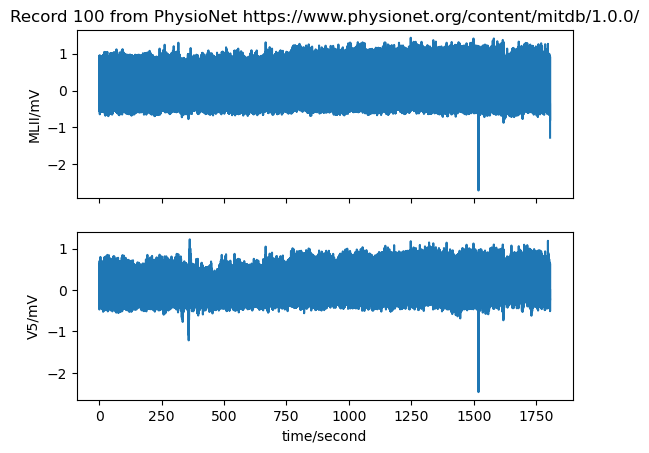

{'record_name': '100',
 'n_sig': 2,
 'fs': 360,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 650000,
 'base_time': None,
 'base_date': None,
 'comments': ['69 M 1085 1629 x1', 'Aldomet, Inderal'],
 'sig_name': ['MLII', 'V5'],
 'p_signal': array([[-0.145, -0.065],
        [-0.145, -0.065],
        [-0.145, -0.065],
        ...,
        [-0.675, -0.365],
        [-0.765, -0.335],
        [-1.28 ,  0.   ]]),
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['100.dat', '100.dat'],
 'fmt': ['212', '212'],
 'samps_per_frame': [1, 1],
 'skew': [None, None],
 'byte_offset': [None, None],
 'adc_gain': [200.0, 200.0],
 'baseline': [1024, 1024],
 'units': ['mV', 'mV'],
 'adc_res': [11, 11],
 'adc_zero': [1024, 1024],
 'init_value': [995, 1011],
 'checksum': [-22131, 20052],
 'block_size': [0, 0]}

In [5]:
# Demo 1 - Read a WFDB record using the 'rdrecord' function into a wfdb.Record object.
# Plot the signals, and show the data.
record = wfdb.rdrecord(dataset_directory / '100') 
wfdb.plot_wfdb(record=record, title='Record 100 from PhysioNet https://www.physionet.org/content/mitdb/1.0.0/') 
display(record.__dict__)

In [6]:
# Demo 2 - Read certain channels and sections of the WFDB record using the simplified 'rdsamp' function
# which returns a numpy array and a dictionary. Show the data.
signals, fields = wfdb.rdsamp(dataset_directory / '100', channels=[0, 1], sampfrom=100, sampto=15000)
display(signals)
display(fields)

array([[-0.33 , -0.195],
       [-0.335, -0.185],
       [-0.33 , -0.185],
       ...,
       [-0.52 , -0.275],
       [-0.54 , -0.315],
       [-0.545, -0.31 ]])

{'fs': 360,
 'sig_len': 14900,
 'n_sig': 2,
 'base_date': None,
 'base_time': None,
 'units': ['mV', 'mV'],
 'sig_name': ['MLII', 'V5'],
 'comments': ['69 M 1085 1629 x1', 'Aldomet, Inderal']}

In [7]:
signals.shape

(14900, 2)

In [8]:
signals

array([[-0.33 , -0.195],
       [-0.335, -0.185],
       [-0.33 , -0.185],
       ...,
       [-0.52 , -0.275],
       [-0.54 , -0.315],
       [-0.545, -0.31 ]])

## Prompt for GPT-4

> please plot the signals in a numpy array of shape (14900, 2) called `signals` using the altair library in python for a two-lead EKG signal

In [9]:
import pandas as pd
import altair as alt
alt.data_transformers.disable_max_rows()

# First convert the numpy array to a pandas DataFrame
df = pd.DataFrame(signals, columns=['Lead 1', 'Lead 2'])

# Next create an index column for the x-axis
df = df.reset_index().melt('index')

# Then use Altair to plot the signals
chart = alt.Chart(df).mark_line().encode(
    x='index',
    y='value',
    color='variable'
).interactive()

chart


alt.Chart(...)

In [11]:
chart.save('/tmp/chart.png')

# Iterate through all the files


In [12]:
for file in dataset_directory.glob('*.dat'):
    print(file.stem)
    signals, fields = wfdb.rdsamp(dataset_directory / file.stem, channels=[0, 1], sampfrom=100, sampto=15000)

    # First convert the numpy array to a pandas DataFrame
    df = pd.DataFrame(signals, columns=['Lead 1', 'Lead 2'])

    # Next create an index column for the x-axis
    df = df.reset_index().melt('index')

    # Then use Altair to plot the signals
    chart = alt.Chart(df).mark_line().encode(
        x='index',
        y='value',
        color='variable'
    )

    chart.save(dataset_directory / str(f'{file.stem}.png'))

213
207
212
210
205
201
215
214
200
228
202
203
217
106
112
113
107
111
105
104
114
100
101
115
103
117
116
102
124
118
119
109
121
108
122
123
232
233
231
219
230
208
220
234
221
209
223
222


In [19]:
!pip install ipyplot

In [20]:
import ipyplot

In [26]:
image_list = list([str(x) for x in dataset_directory.glob('*.png')])
print(image_list)

['/Users/me/tmp/physionet.org/files/mitdb/1.0.0/228.png', '/Users/me/tmp/physionet.org/files/mitdb/1.0.0/200.png', '/Users/me/tmp/physionet.org/files/mitdb/1.0.0/214.png', '/Users/me/tmp/physionet.org/files/mitdb/1.0.0/215.png', '/Users/me/tmp/physionet.org/files/mitdb/1.0.0/201.png', '/Users/me/tmp/physionet.org/files/mitdb/1.0.0/217.png', '/Users/me/tmp/physionet.org/files/mitdb/1.0.0/203.png', '/Users/me/tmp/physionet.org/files/mitdb/1.0.0/202.png', '/Users/me/tmp/physionet.org/files/mitdb/1.0.0/212.png', '/Users/me/tmp/physionet.org/files/mitdb/1.0.0/207.png', '/Users/me/tmp/physionet.org/files/mitdb/1.0.0/213.png', '/Users/me/tmp/physionet.org/files/mitdb/1.0.0/205.png', '/Users/me/tmp/physionet.org/files/mitdb/1.0.0/210.png', '/Users/me/tmp/physionet.org/files/mitdb/1.0.0/115.png', '/Users/me/tmp/physionet.org/files/mitdb/1.0.0/101.png', '/Users/me/tmp/physionet.org/files/mitdb/1.0.0/100.png', '/Users/me/tmp/physionet.org/files/mitdb/1.0.0/114.png', '/Users/me/tmp/physionet.org/f

In [27]:
ipyplot.plot_images(image_list, max_images=20, img_width=150)